In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

import mission_tools

%matplotlib widget

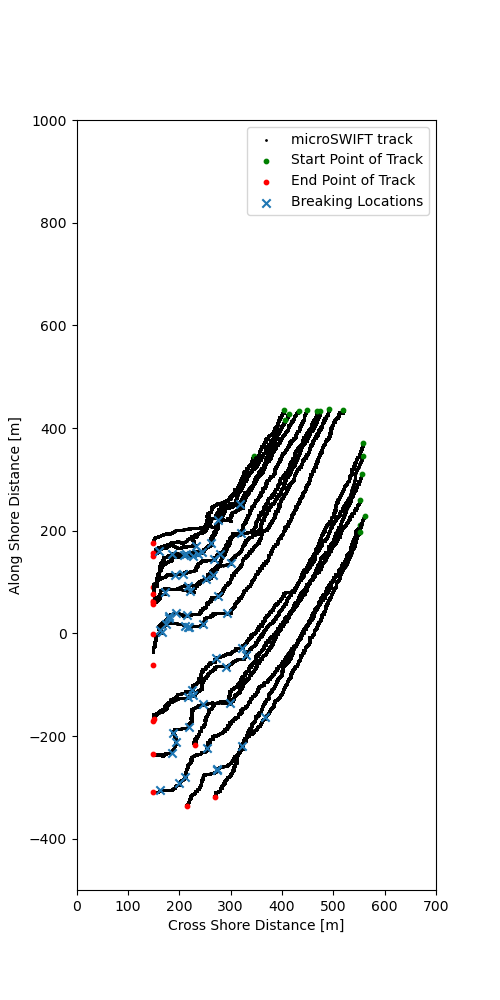

In [2]:
# Load mission 19 data and plot tracks over the radar image
mission_nc_path = '../microSWIFT_data/final_dataset/mission_19.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')

# Load the breaker dataset
breaker_df = pd.read_csv('../microSWIFT_data/breaker_df.csv')
breaker_df_mission19 = breaker_df[breaker_df['mission number'] == 19]

# Plot the microSWIFT tracks over the radar image
x_locations = np.ma.masked_invalid(mission_dataset['xFRF'])
y_locations = np.ma.masked_invalid(mission_dataset['yFRF'])
time_vals = mission_dataset['time'][:]

fig, ax = plt.subplots(figsize=(5,10))

for n in range(mission_dataset['trajectory'].size-1):
    edge_inds_x = np.ma.flatnotmasked_edges(x_locations[n,:])
    edge_inds_y = np.ma.flatnotmasked_edges(y_locations[n,:])
    start_ind = np.max([edge_inds_x[0], edge_inds_y[0]])
    end_ind = np.min([edge_inds_x[1], edge_inds_y[1]])
    map = ax.scatter(x_locations[n,:],
                        y_locations[n,:],
                        c='k', s=1)
    map = ax.scatter(x_locations[n,start_ind],
                     y_locations[n,start_ind],
                     c='g', s=10)
    map = ax.scatter(x_locations[n,end_ind],
                     y_locations[n,end_ind],
                     c='r', s=10)
    
# plot last track and label points for legend
edge_inds_x = np.ma.flatnotmasked_edges(x_locations[-1,:])
edge_inds_y = np.ma.flatnotmasked_edges(y_locations[-1,:])
start_ind = np.max([edge_inds_x[0], edge_inds_y[0]])
end_ind = np.min([edge_inds_x[1], edge_inds_y[1]])
map = ax.scatter(x_locations[-1,:],
                    y_locations[-1,:],
                    c='k', s=1, label='microSWIFT track')
map = ax.scatter(x_locations[-1,start_ind],
                    y_locations[-1,start_ind],
                    c='g', s=10, label='Start Point of Track')
map = ax.scatter(x_locations[-1,end_ind],
                    y_locations[-1,end_ind],
                    c='r', s=10, label='End Point of Track')

# Scatter all Detected Breaking locations from the mission
ax.scatter(breaker_df_mission19['cross shore location [m]'], breaker_df_mission19['along shore location [m]'], 
           marker='x', label='Breaking Locations')

ax.set_xlim(0, 700)
ax.set_ylim(-500, 1000)
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.legend()
ax.set_aspect('equal')

In [3]:
# load the offshore wave conditon dataframe
offshore_df = pd.read_csv('../microSWIFT_data/mission_df.csv')
mission_19_df = offshore_df[offshore_df['mission number'] == 19]
mission_19_df

,Unnamed: 0,time,mission number,Hs [m],Tm [s],Mean Dir [deg],cross shore gamma location [m],break depth,freq [hz],energy density [m^2\hz],direction bins [deg],directional energy density [m^2/hz/deg],wind speed [m/s],wind direction [deg],water level [m]
6,6,2021-10-08 18:31:59.996640,19,1.153885,5.855787,67.689864,273.300564,3.296814,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.01377242289597856, 0.05397805134639883, 0.2...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[2.326480534975417e-05, 2.5262941562687047e-0...",8.237333,33.15201,-0.399


In [4]:
# load the breaker event dataframe
breaker_df = pd.read_csv('../microSWIFT_data/breaker_df.csv')
breaker_mission_19_df = breaker_df[breaker_df['mission number'] == 19]
breaker_mission_19_df

,Unnamed: 0,time,mission number,trajectory number,cross shore location [m],cross shore location normalized [m],along shore location [m]
263,263,2021-10-08 18:37:27.453663,19.0,0.0,330.362660,1.208789,-41.728714
264,264,2021-10-08 18:39:12.453244,19.0,0.0,291.863792,1.067922,-65.185441
265,265,2021-10-08 18:42:47.452383,19.0,0.0,227.360434,0.831906,-120.435402
266,266,2021-10-08 18:42:57.452344,19.0,0.0,217.940416,0.797439,-123.681444
267,267,2021-10-08 18:37:42.453603,19.0,1.0,322.731201,1.180865,-27.865307
268,268,2021-10-08 18:39:27.453184,19.0,1.0,272.296896,0.996328,-48.639980
269,269,2021-10-08 18:42:37.452424,19.0,1.0,225.354431,0.824566,-109.478327
270,270,2021-10-08 18:42:27.452464,19.0,3.0,253.329479,0.926926,-222.843800
271,271,2021-10-08 18:44:22.452004,19.0,3.0,211.065622,0.772284,-279.547003
272,272,2021-10-08 18:44:47.451904,19.0,3.0,200.295149,0.732875,-292.038098


In [5]:
# Compute Stokes Drift Estimate from offshore conditions
g = 9.8 
Tm = mission_19_df['Tm [s]'].values[0]
Hs = mission_19_df['Hs [m]'].values[0]
stokes_drift = (((2 * np.pi)**3 / g) * Hs**2 / Tm**3)
print(stokes_drift)

0.16783500593077116


In [6]:
# Solve for Offshore Wavelength
lambda_m = 1 / mission_tools.solve_dispersion_relation(9.8, 8, 2*np.pi/Tm)
print(lambda_m)

6.959444950185791


In [7]:
# Split trajectories from mission 19 into bins
window_size_seconds = int(Tm)
window_size = window_size_seconds * 12
time = np.linspace(0, window_size_seconds, num=window_size)

# Set the breaking threshold from the breaker dataset
breaking_threshold = 2

breaking_x_tracks = []
breaking_y_tracks = []
nonbreaking_x_tracks = []
nonbreaking_y_tracks = []


x_locations = np.ma.masked_invalid(mission_dataset['xFRF'])
y_locations = np.ma.masked_invalid(mission_dataset['yFRF'])
vertical_accels = np.ma.masked_invalid(mission_dataset['acceleration_z_body'])
time_vals = mission_dataset['time'][:]

num_microswifts = x_locations.shape[0]
for microswift_num in range(num_microswifts):
    x_location_individual = x_locations[microswift_num,:]
    x_location_windowed = np.reshape(x_location_individual[:(x_location_individual.size//window_size * window_size)],
                                (x_location_individual.size//window_size, window_size))

    y_location_individual = y_locations[microswift_num,:]
    y_location_windowed = np.reshape(y_location_individual[:(y_location_individual.size//window_size * window_size)],
                                (y_location_individual.size//window_size, window_size))
    
    vertical_accel_individual = vertical_accels[microswift_num,:]
    vertical_accel_windowed = np.reshape(vertical_accel_individual[:(vertical_accel_individual.size//window_size * window_size)],
                                (vertical_accel_individual.size//window_size, window_size))

    # Compute Baseline variance to compare the breaking variance to 
    vertical_accel_total_variance = np.nanvar(vertical_accel_individual)
    vertical_accel_var_in_window = np.nanvar(vertical_accel_windowed, axis=1)
    
    # Number of windows 
    num_windows = x_location_windowed.shape[0]

    # Get breaking events in each segment
    for n in range(num_windows):
        try:
            # checking if breaking occurs in the window
            breaking_in_segment = vertical_accel_var_in_window[n] > (breaking_threshold*vertical_accel_total_variance)

            if breaking_in_segment:
                breaking_x_tracks.append(x_location_windowed[n,:])
                breaking_y_tracks.append(y_location_windowed[n,:])
            
            else:
                nonbreaking_x_tracks.append(x_location_windowed[n,:])
                nonbreaking_y_tracks.append(y_location_windowed[n,:])
        except:
            continue



In [8]:
def distance_formula(x, y):
    """
    Compute the distance between the start x and y location and each other location
    """
    return np.sqrt((x[0]-x)**2 + (y[0]-y)**2)

/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_18475/4223685077.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x[0]-x)**2 + (y[0]-y)**2)


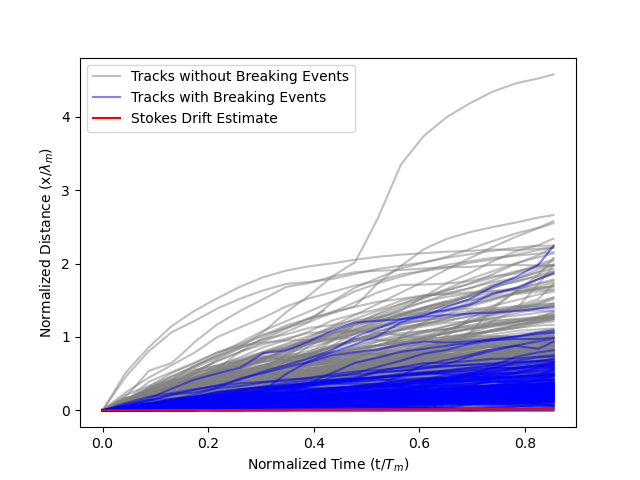

In [9]:
fig, ax = plt.subplots()
for n in range(len(nonbreaking_x_tracks)-1):
    ax.plot(time/Tm, distance_formula(nonbreaking_x_tracks[n], nonbreaking_y_tracks[n])/lambda_m, color='gray', alpha=0.5)
ax.plot(time/Tm, distance_formula(nonbreaking_x_tracks[-1], nonbreaking_y_tracks[-1])/lambda_m, color='gray', label='Tracks without Breaking Events', alpha=0.5)

for n in range(len(breaking_x_tracks)-1):
    ax.plot(time/Tm, distance_formula(breaking_x_tracks[n], breaking_y_tracks[n])/lambda_m, color='blue', alpha=0.5)
ax.plot(time/Tm, distance_formula(breaking_x_tracks[-1], breaking_y_tracks[-1])/lambda_m, color='blue', label='Tracks with Breaking Events', alpha=0.5)

# Stokes Drift Estimate
ax.plot(time/Tm, (stokes_drift * (time/Tm))/lambda_m, color='r', label='Stokes Drift Estimate')

ax.set_xlabel('Normalized Time (t/$T_m)$')
ax.set_ylabel('Normalized Distance (x/$\lambda_m$)')
ax.legend()

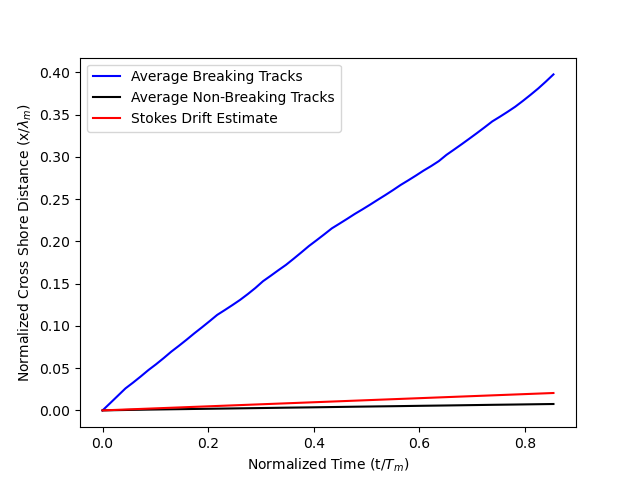

In [10]:
# Average the normalized breaking and nonbreaking tracks
breaking_tracks_norm = np.empty((len(breaking_x_tracks), time.size))
for n in range(breaking_tracks_norm.shape[0]):
    breaking_tracks_norm[n,:] = (distance_formula(breaking_x_tracks[n].filled(np.nan), breaking_y_tracks[n].filled(np.nan))/lambda_m)

nonbreaking_tracks_norm = np.empty((len(nonbreaking_x_tracks), time.size))
for n in range(breaking_tracks_norm.shape[0]):
    nonbreaking_tracks_norm[n,:] = (distance_formula(nonbreaking_x_tracks[n].filled(np.nan), nonbreaking_y_tracks[n].filled(np.nan))/lambda_m)
time_norm = time/Tm

# Average Tracks
breaking_tracks_norm_avg = np.nanmean(breaking_tracks_norm, axis=0)
nonbreaking_tracks_norm_avg = np.nanmean(nonbreaking_tracks_norm, axis=0)

# Track standard deviation
breaking_tracks_norm_std = np.nanstd(breaking_tracks_norm, axis=0)
nonbreaking_tracks_norm_std = np.nanstd(nonbreaking_tracks_norm, axis=0)

fig, ax = plt.subplots()
ax.plot(time_norm, breaking_tracks_norm_avg, color='blue', label='Average Breaking Tracks')

ax.plot(time_norm, nonbreaking_tracks_norm_avg, color='k', label='Average Non-Breaking Tracks')

ax.plot(time/Tm, (stokes_drift * (time/Tm))/lambda_m, color='r', label='Stokes Drift Estimate')
ax.set_xlabel('Normalized Time (t/$T_m)$')
ax.set_ylabel('Normalized Cross Shore Distance (x/$\lambda_m$)')
ax.legend()

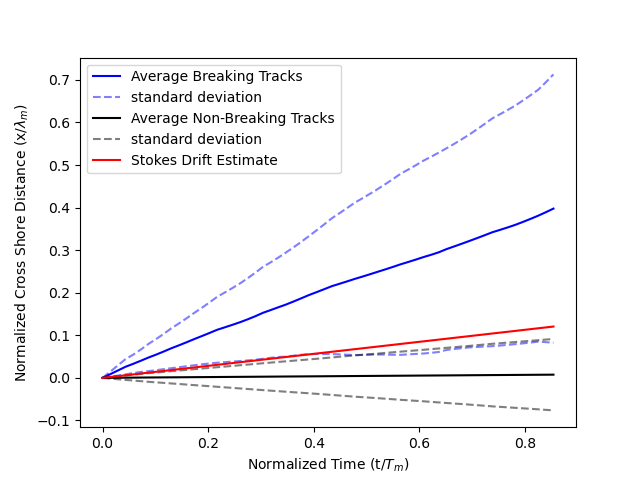

In [11]:
fig, ax = plt.subplots()
ax.plot(time_norm, breaking_tracks_norm_avg, color='blue', label='Average Breaking Tracks')
ax.plot(time_norm, breaking_tracks_norm_avg-breaking_tracks_norm_std, color='blue', alpha=0.5, linestyle='dashed')
ax.plot(time_norm, breaking_tracks_norm_avg+breaking_tracks_norm_std, color='blue', alpha=0.5, linestyle='dashed', label='standard deviation')

ax.plot(time_norm, nonbreaking_tracks_norm_avg, color='k', label='Average Non-Breaking Tracks')
ax.plot(time_norm, nonbreaking_tracks_norm_avg-nonbreaking_tracks_norm_std, color='k', alpha=0.5, linestyle='dashed', label='standard deviation')
ax.plot(time_norm, nonbreaking_tracks_norm_avg+nonbreaking_tracks_norm_std, color='k', alpha=0.5, linestyle='dashed')

ax.plot(time/Tm, (stokes_drift * (time))/lambda_m, color='r', label='Stokes Drift Estimate')
ax.set_xlabel('Normalized Time (t/$T_m)$')
ax.set_ylabel('Normalized Cross Shore Distance (x/$\lambda_m$)')
ax.legend()